In [ ]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import matplotlib.colors as colors
import numpy as np
import math
import random 
from copy import deepcopy

In [ ]:
#class Point
class point:
  
  #Distance with the reference point
  distance = 0

  #If dominated = 0 => EF / if dominated = 1 => The point is dominated
  dominated=0

  #Si neigbourg ==1 => The point is a neigbourg of the reference point
  neigbourg = 0

  selected = 0

  def __init__(self, x, y,l_x ,id):

    self.x = x
    self.y = y
    self.l_x = l_x
    self.l_y = 1-l_x
    self.id =id

  def is_dominated(self):
    self.dominated = 1

  def is_neigbourg (self):
    self.neigbourg =1

  def is_selected(self):
    self.selected = 1

  def set_distance(self,point):

    self.distance = math.sqrt(pow(self.l_x-point.l_x,2)+pow(self.l_y-point.l_y,2))
  
  def get_position(self):
    return([self.x,self.y])

  def plot(self):

    if self.selected == 1 :
      plt.quiver(self.x,self.y,-self.l_x,-self.l_y,color='red')

    elif self.dominated == 0 :
      plt.quiver(self.x,self.y,-self.l_x,-self.l_y,color='blue')

    elif self.neigbourg == 1 :
      plt.quiver(self.x,self.y,-self.l_x,-self.l_y,color='green')
    

    else :
      plt.quiver(self.x,self.y,-self.l_x,-self.l_y,color='black')

In [ ]:
#Function which determine the Pareto Front
def set_all_pareto(inputPoints,dominates):

    inputPoints_copy  = deepcopy(inputPoints)

    dominatedPoints = []
    paretoPoints = []
    candidateRowNr = 0
    
    while True:
        
        candidateRow = inputPoints_copy[candidateRowNr]
        inputPoints_copy.remove(inputPoints_copy[candidateRowNr])
        rowNr = 0
        nonDominated = True

        while len(inputPoints_copy) != 0 and rowNr < len(inputPoints_copy):
            row = inputPoints_copy[rowNr]
            if dominates(candidateRow.get_position(), row.get_position()):
                # If it is worse on all features remove the row from the array
                inputPoints_copy.remove(inputPoints_copy[rowNr])
                dominatedPoints.append(row)
            elif dominates(row.get_position(), candidateRow.get_position()):
                nonDominated = False
                dominatedPoints.append(candidateRow)
                rowNr += 1
            else:
                rowNr += 1

        if nonDominated:
            # add the non-dominated point to the Pareto frontier
            paretoPoints.append(candidateRow)

        if len(inputPoints_copy) == 0:
            break
    for k in range(len(dominatedPoints)):
      inputPoints[dominatedPoints[k].id].is_dominated()

#Function which return Pareto Front
def get_all_pareto(inputPoints):
  pareto_list = []
  for k in range (len(inputPoints)):
    if inputPoints[k].dominated == 0:
      pareto_list.append(inputPoints[k])
  return(pareto_list)

def dominates(row, candidateRow):
    return sum([row[x] <= candidateRow[x] for x in range(len(row))]) == len(row)  

In [ ]:
#FUnction which generate the population
def generate_population(n):
  inputPoints = []
  for k in range (n):
    
    x = np.random.rand(2)*10
    l = np.random.rand(1)
    inputPoints.append(point(x[0],x[1],l,k))

  return(inputPoints)


In [ ]:
#Function which determine neigbourg of reference point
def set_all_neigbourg(inputPoints,delta):
  input_distance=[]
  for k in range(1,len(inputPoints)):
    input_distance.append([inputPoints[k].distance,k])
  input_distance =sorted(input_distance, key=lambda distance: distance[0])

  for k in range(1,delta+1):
    inputPoints[input_distance[k][1]].is_neigbourg()

#Function which return all neigbourg point  
def get_all_neigbourg(inputPoints):
  neigbourg_list =[]
  for k in range (len(inputPoints)):
    if inputPoints[k].neigbourg == 1:
      neigbourg_list.append(inputPoints[k])
  return(neigbourg_list)

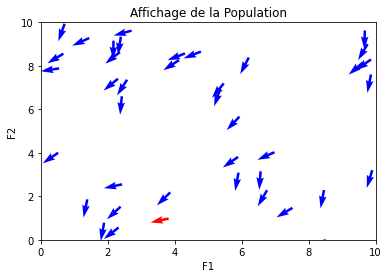

In [ ]:
#Hyperparamètres
p = 40
delta = 5
gamma = 0.3

#Generation of population
inputPoints = generate_population(p)

#Selection of reference point
inputPoints[0].is_selected()
Point_selected = inputPoints[0]

for k in range(p) :
  inputPoints[k].set_distance(Point_selected)

#Plot of the probleme
for k in range(p) :
  inputPoints[k].plot()

plt.xlim(0,10)
plt.ylim(0,10)

plt.ylabel("F2")
plt.xlabel("F1")
plt.title("Population's Plot")
plt.show()

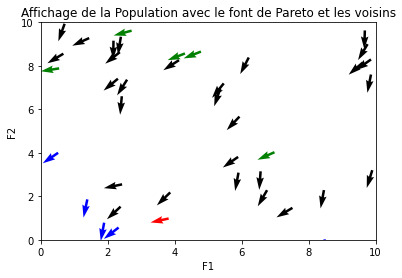

In [ ]:
#Setteling of Lambda_Neigbourg 
set_all_neigbourg(inputPoints,delta)

#Pareto Front's determination
set_all_pareto(inputPoints,dominates)

#Plot of probleme
for k in range(p) :
  inputPoints[k].plot()

plt.xlim(0,10)
plt.ylim(0,10)

plt.ylabel("F2")
plt.xlabel("F1")
plt.title("Plot of the population with Pareto Front and Neigbourg")

plt.show()

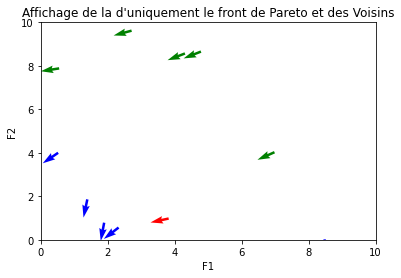

In [ ]:
Neigbourg_list = get_all_neigbourg(inputPoints)
Pareto_list = get_all_pareto(inputPoints)

for k in range (len(Pareto_list)):
  Pareto_list[k].plot()

for k in range (len(Neigbourg_list)):
  Neigbourg_list[k].plot()

Point_selected.plot()

plt.ylabel("F2")
plt.xlabel("F1")
plt.title("Plot of the population with only Pareto Front and Neigbourg")
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

In [1]:
alpha = np.random.rand()
print("Tirage aléatoiree :",alpha)

if (alpha<gamma) :
  print("Sélection of parent from neigbourg and one front pareto front")
  p_a = random.choice(Neigbourg_list)
  p_b = random.choice(Pareto_list)

else :
  print("Sélection of 2 parents from neigbourg")
  p_a = random.choice(Neigbourg_list)
  p_b = random.choice(Neigbourg_list)

Point_selected.plot()
p_a.plot()
p_b.plot()

plt.ylabel("F2")
plt.xlabel("F1")
plt.title("Plot of selected Parents ")

plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

NameError: ignored